___
# Projeto 3 - CD
___

## Regressão linear que agrupa diferentes tipos de músicas de acordo com sua dançabilidade.

O objetivo desse projeto é fazer diferentes agrupamentos de músicas do Spotify, utilizando a regressão linear, levando em consideração o quão dançável é a música. Queremos analisar o tamanho obtido e as diferenças das quantidades de músicas em determinados grupos.

Exemplo de aplicação da técnica: https://www.kaggle.com/noemir/dimension-reduction-of-music-pref-in-progress/comments 

**Nomes das integrantes:**
Rebeca Moreno,
Giulia Passarelli e
Carla Kim

In [14]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import expon
import seaborn as sns
import statsmodels.api as sm

from mpl_toolkits.mplot3d import Axes3D

In [48]:
#lendo a planilha de dados
sptdata = pd.read_csv("data.csv")

#ajustando a quantidade de termos que precisamos usar
spotdata = sptdata[0:100]
spotdatatreina = sptdata[100:200]

Dicionário dos dados:
https://www.kaggle.com/nyartsgnaw/analyzing-gender-differences/data

In [53]:
spotdata.notakey = spotdata.key
spotdata.notakey = spotdata.notakey.astype('category')
l = ['C','C♯, D♭','D','D♯, E♭','E','F','F♯, G♭','G','G♯, A♭','A','A♯, B♭','B']
spotdata.notakey.cat.categories = (l)

df = pd.DataFrame()
df['notakey'] = spotdata.notakey
df['tom'] = spotdata['mode']
df.tom = df.tom.astype('category')
df.tom.cat.categories = (['Menor','Maior'])

#tabela de frequência das notas (key)
pd.crosstab(spotdata.notakey,'Frequências', colnames=['Notas musicais'])
pd.crosstab(df['tom'],df['notakey'], colnames=['Notas musicais'])
print(df.describe())
pd.crosstab(spotdata.notakey,'Frequências', colnames=['Notas musicais'])

       notakey    tom
count      100    100
unique      12      2
top     C♯, D♭  Maior
freq        16     60


Notas musicais,Frequências
key,
C,10
"C♯, D♭",16
D,13
"D♯, E♭",2
E,3
F,8
"F♯, G♭",5
G,9
"G♯, A♭",5


//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pan

'D'

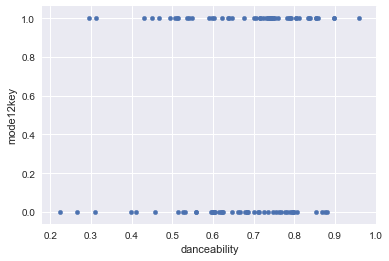

In [31]:
#para o treinamento do computador dos 100 primeiros termos
spotdata['mode12key'] = spotdata['mode']*12 + spotdata['key']


spotdata['mode12key'] = np.where(spotdata.mode12key >= spotdata['mode12key'].mean(), 1, 0)

#para o teste dos novos termos de 100 a 200
spotdata['mode12keytreina'] = spotdatatreina['mode']*12 + spotdatatreina['key']
spotdata['mode12keytreina'] = np.where(spotdata.mode12keytreina >= spotdata['mode12keytreina'].mean(), 1, 0)

#plot do gráfico 
spotdata.plot(kind = "scatter", x = "danceability", y = "mode12key")


## **Part 2:** Predicting a Categorical Response

In [6]:
# fit a logistic regression model and store the class predictions
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
feature_cols = ['danceability']
X = spotdata[feature_cols]
y = spotdata.mode12key
logreg.fit(X, y)
spotdata['mode12key_pred_class'] = logreg.predict(X)

#train_cols = spotdata.columns[1:]
logit = sm.Logit(spotdata['danceability'], spotdata['mode12key_pred_class'])
result = logit.fit()
print(result)

logit2 = sm.Logit(spotdata['danceability'], spotdata['mode12key'])
result2 = logit2.fit()
print(result2)

logit3 = sm.Logit(spotdata['danceability'], spotdata['energy'])
result3 = logit3.fit()
print(result3)

#logit4 = sm.Logit(spotdata['danceability'], spotdata['k'])
#result4 = logit4.fit()
#print(result4)

Optimization terminated successfully.
         Current function value: 0.530908
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.625494
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.595376
         Iterations 4


//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [7]:
#train_cols = spotdata.columns[2]
#print(train_cols)

In [8]:
print (result.summary())
print (result2.summary())
print (result3.summary())


                           Logit Regression Results                           
Dep. Variable:           danceability   No. Observations:                  100
Model:                          Logit   Df Residuals:                       99
Method:                           MLE   Df Model:                            0
Date:                Fri, 17 Nov 2017   Pseudo R-squ.:                 0.09491
Time:                        09:45:17   Log-Likelihood:                -53.091
converged:                       True   LL-Null:                       -58.658
                                        LLR p-value:                       nan
                           coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
mode12key_pred_class     1.1449      0.290      3.950      0.000         0.577     1.713
                           Logit Regression Results                           
Dep. Variable:        

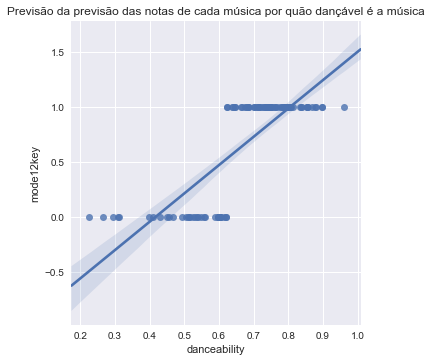

In [9]:
sns.lmplot('danceability','mode12key_pred_class',spotdata)
plt.title('Previsão da previsão das notas de cada música por quão dançável é a música')
plt.xlabel('danceability')
plt.ylabel('mode12key')

In [10]:
spotdata['mode12key_pred_prob'] = logreg.predict_proba(X)[:, 1]

//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


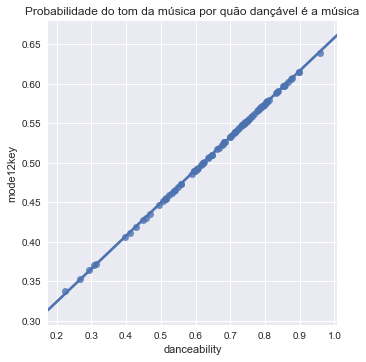

In [11]:
sns.lmplot(x = 'danceability', y='mode12key_pred_prob', data=spotdata)
plt.title('Probabilidade do tom da música por quão dançável é a música')
plt.xlabel('danceability')
plt.ylabel('mode12key')

O gráfico de probabilidade nos diz que, para uma dançabilidade menor, a chance de a música ter um tom menor e ter as notas iniciais (mais próximas de dó (key 0 = C)) é maior que a outra chance.

In [12]:
# examine some example predictions
print(logreg.predict_proba(0.2))
print(logreg.predict_proba(0.5))
print(logreg.predict_proba(0.8))

[[ 0.67173525  0.32826475]]
[[ 0.55153401  0.44846599]]
[[ 0.4249947  0.5750053]]


A primeira coluna 